<a href="https://colab.research.google.com/github/celso-rojas/SSF-Oto24-CelsoRojasPerez/blob/main/Tarea_3_SSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise A.2. Study a function for different parameter values.

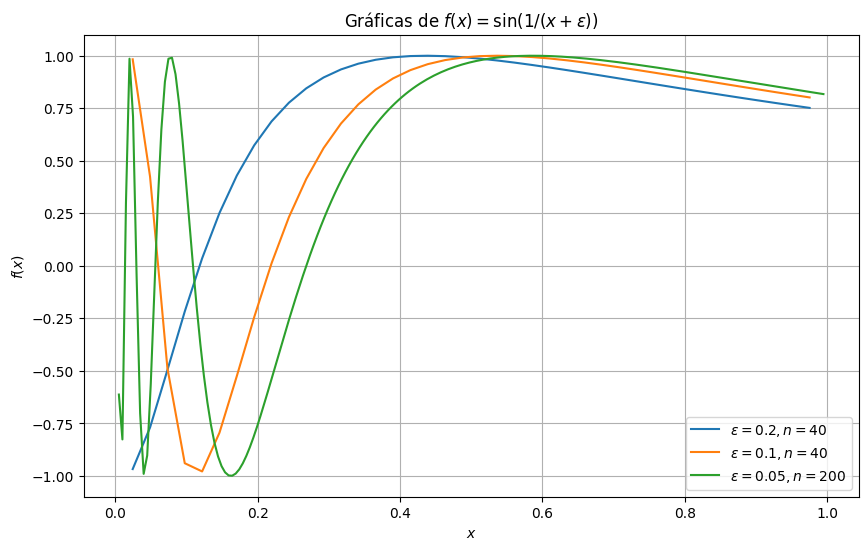

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, epsilon):
    return np.sin(1 / (x + epsilon))


def max_difference(epsilon, tol=0.1, max_iter=500):
    n = 10
    x_prev = np.linspace(0, 1, n + 1, endpoint=False)[1:]
    y_prev = f(x_prev, epsilon)

    while True:
        n += 10
        x_next = np.linspace(0, 1, n + 1, endpoint=False)[1:]
        y_next = f(x_next, epsilon)


        y_prev_interp = np.interp(x_next, x_prev, y_prev)
        diff = np.max(np.abs(y_next - y_prev_interp))

        if diff < tol or n > max_iter:
            break


        x_prev, y_prev = x_next, y_next

    return n, x_next, y_next


def plot_function(epsilon_values, tol=0.1):
    plt.figure(figsize=(10, 6))

    for epsilon in epsilon_values:
        n, x, y = max_difference(epsilon, tol)
        plt.plot(x, y, label=f"$\epsilon = {epsilon}, n = {n}$")

    plt.title("Gráficas de $f(x) = \sin(1 / (x + \epsilon))$")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()
    plt.grid()
    plt.show()

# Parámetros iniciales
epsilon_values = [1/5, 1/10, 1/20]
tolerance = 0.1

# Graficar para los valores dados de epsilon
plot_function(epsilon_values, tolerance)

Exercise A.3. Study a function and its derivative.

---- ε = 0.2, tol = 0.1 ----
Método: finite_difference, n = 2590, Diferencia Máxima = 0.09989


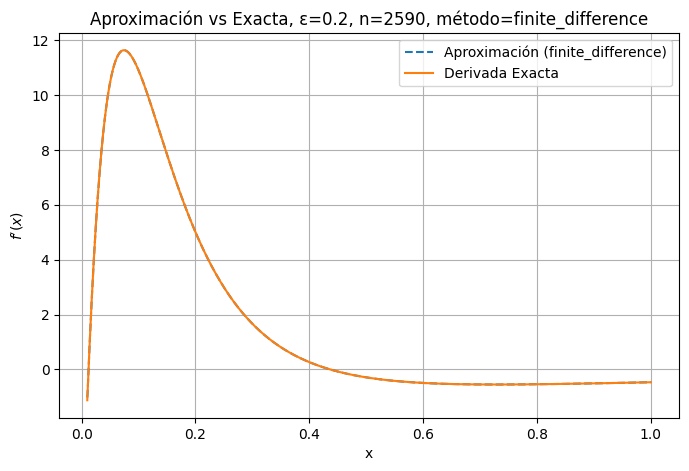

Método: spline, n = 80, Diferencia Máxima = 0.07399


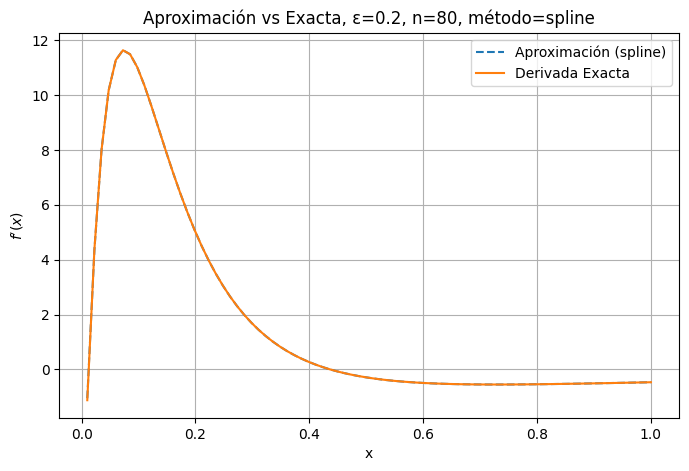

---- ε = 0.2, tol = 0.01 ----
Método: finite_difference, n = 25950, Diferencia Máxima = 0.01000


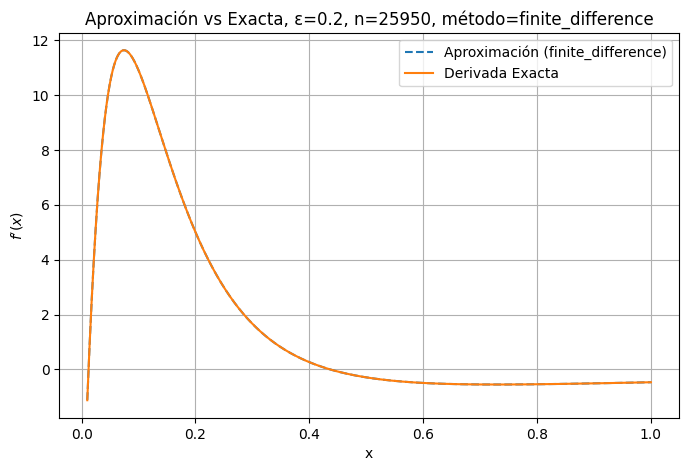

Método: spline, n = 150, Diferencia Máxima = 0.00978


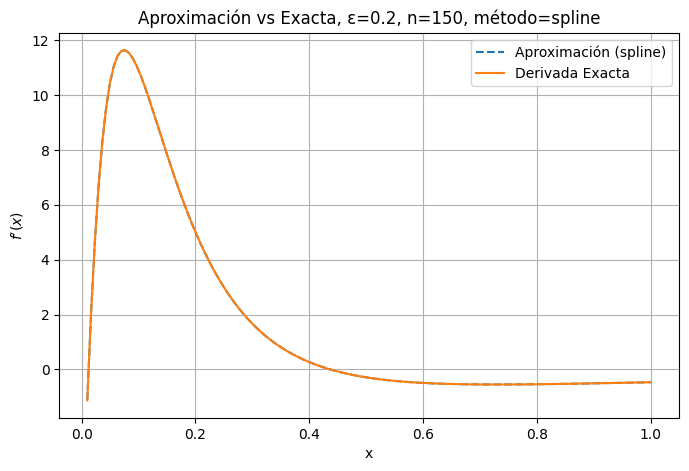

---- ε = 0.2, tol = 0.001 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.00259


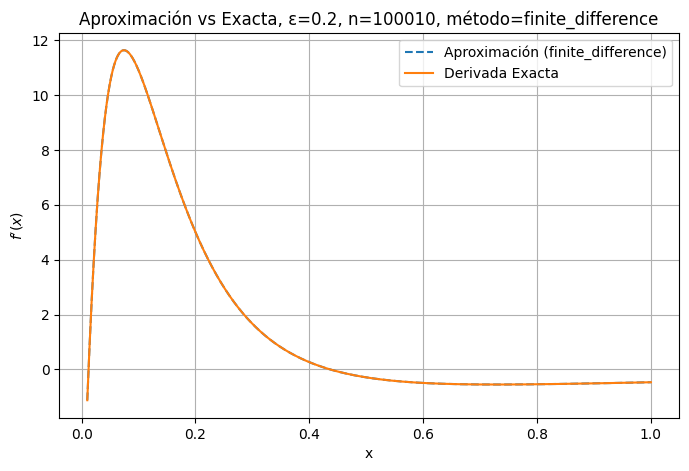

Método: spline, n = 310, Diferencia Máxima = 0.00094


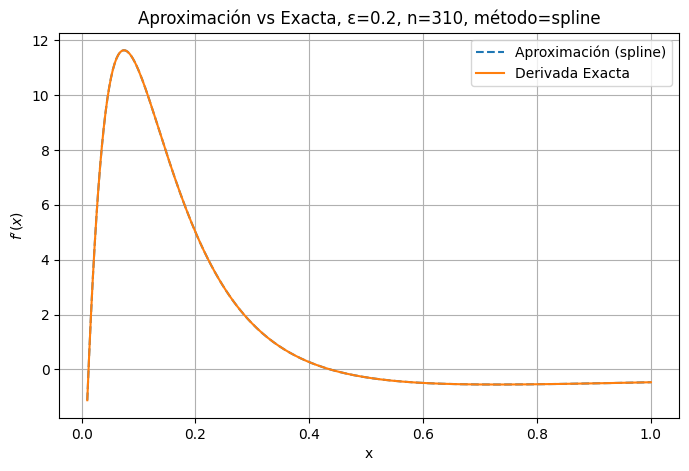

---- ε = 0.1, tol = 0.1 ----
Método: finite_difference, n = 18150, Diferencia Máxima = 0.09995


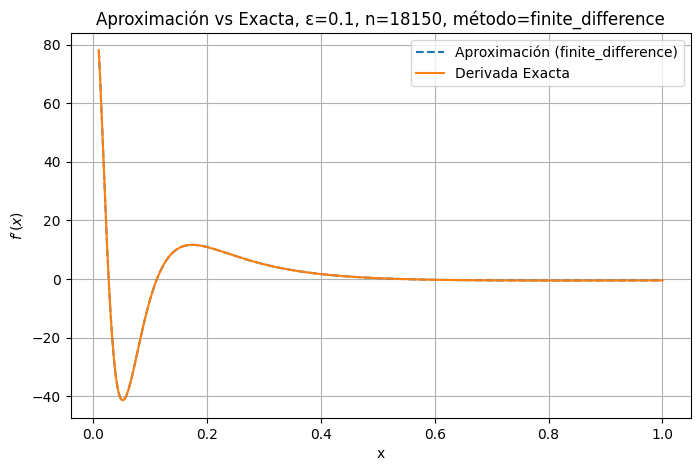

Método: spline, n = 470, Diferencia Máxima = 0.09604


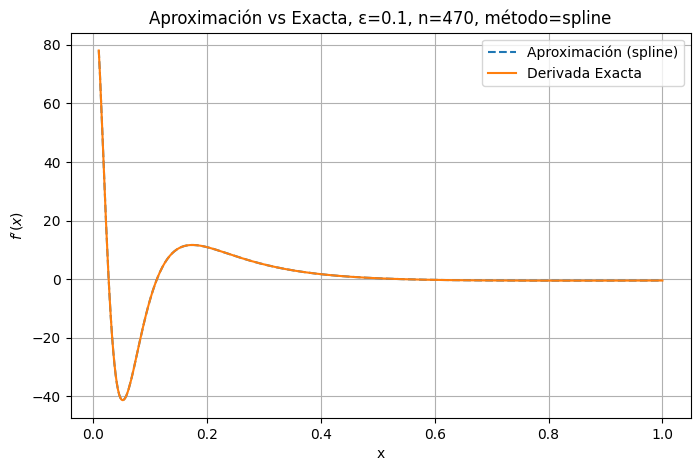

---- ε = 0.1, tol = 0.01 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.01811


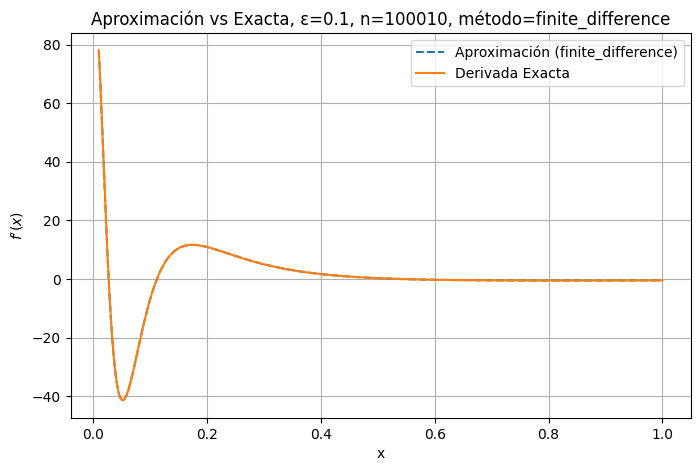

Método: spline, n = 1030, Diferencia Máxima = 0.00985


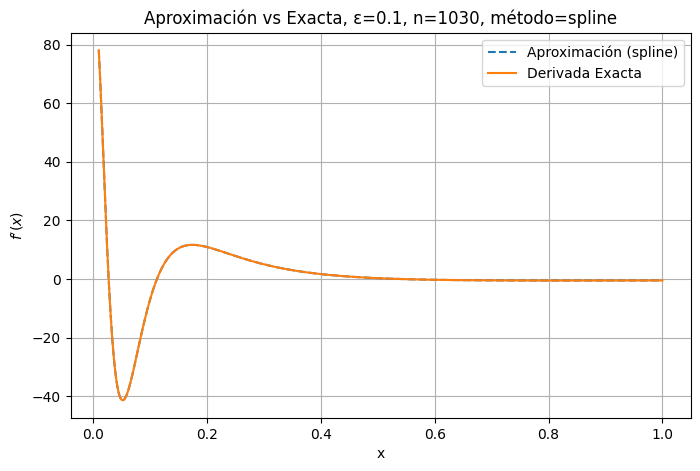

---- ε = 0.1, tol = 0.001 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.01811


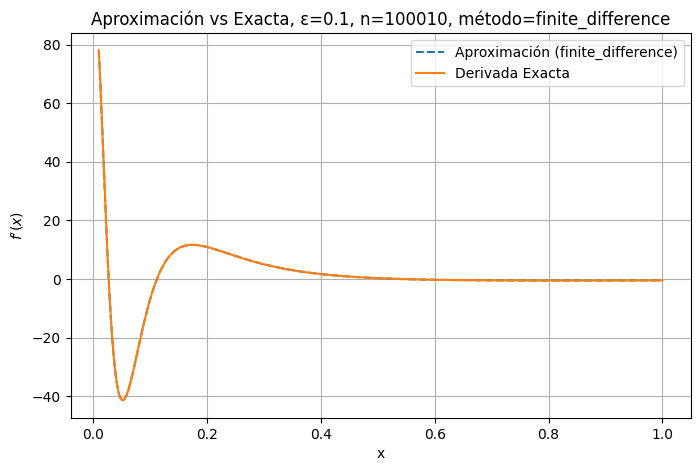

Método: spline, n = 2240, Diferencia Máxima = 0.00099


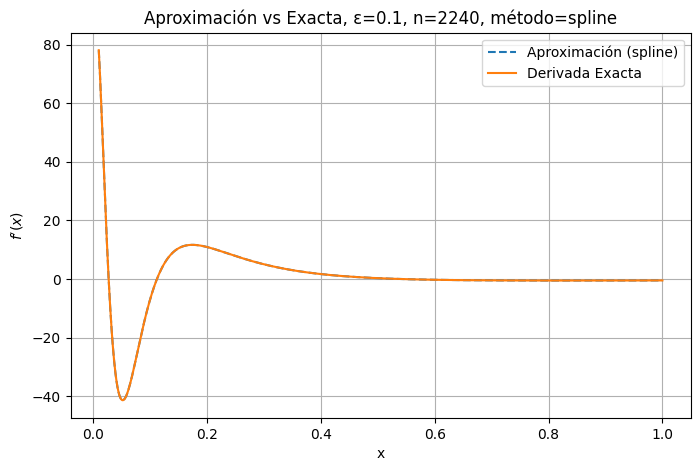

---- ε = 0.05, tol = 0.1 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.28594


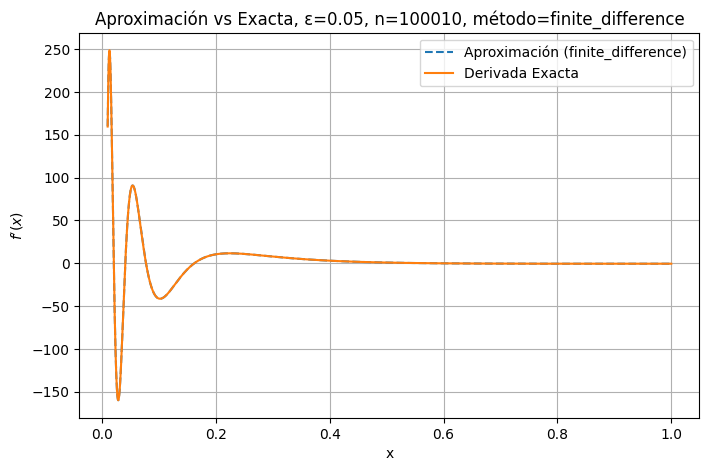

Método: spline, n = 830, Diferencia Máxima = 0.09321


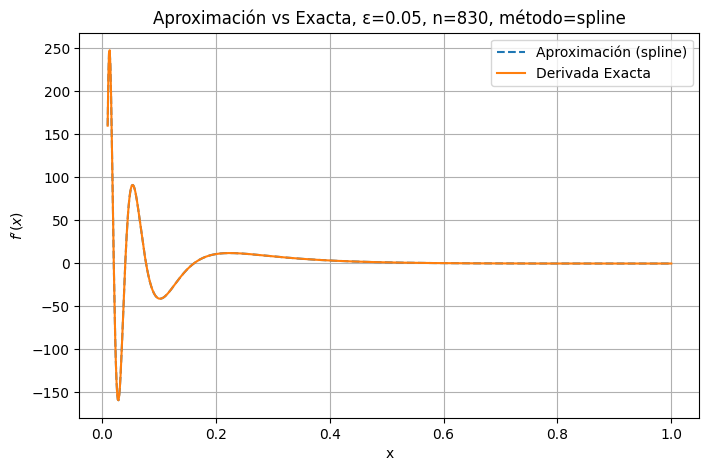

---- ε = 0.05, tol = 0.01 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.28594


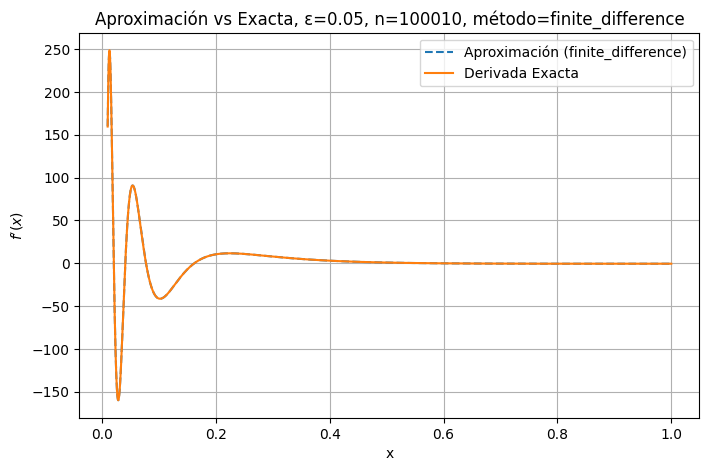

Método: spline, n = 1020, Diferencia Máxima = 0.00937


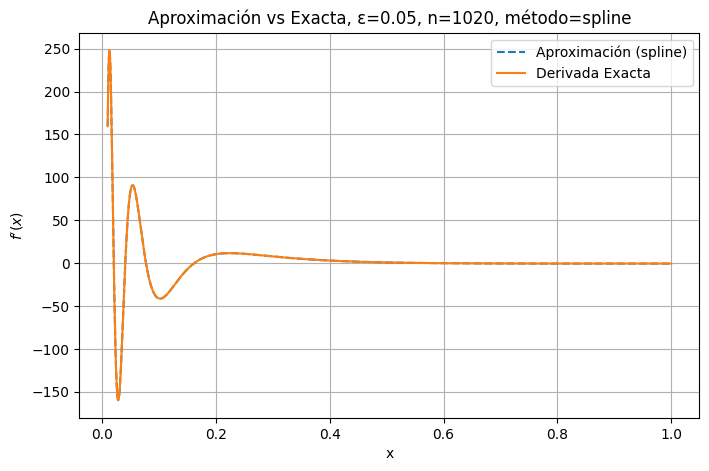

---- ε = 0.05, tol = 0.001 ----
Advertencia: Se alcanzó el máximo de iteraciones.
Método: finite_difference, n = 100010, Diferencia Máxima = 0.28594


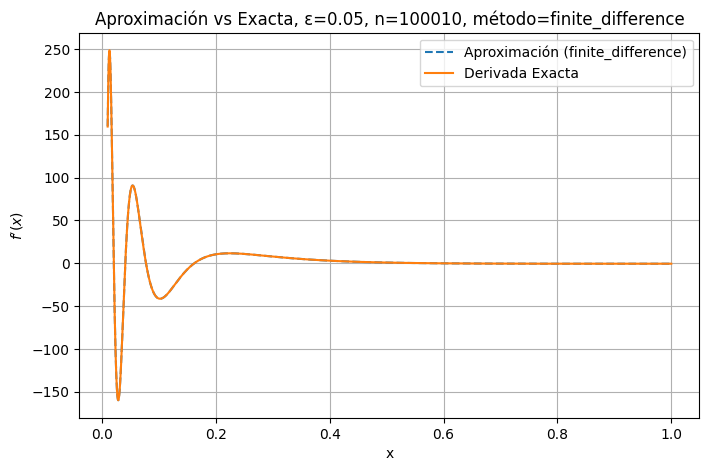

Método: spline, n = 6380, Diferencia Máxima = 0.00100


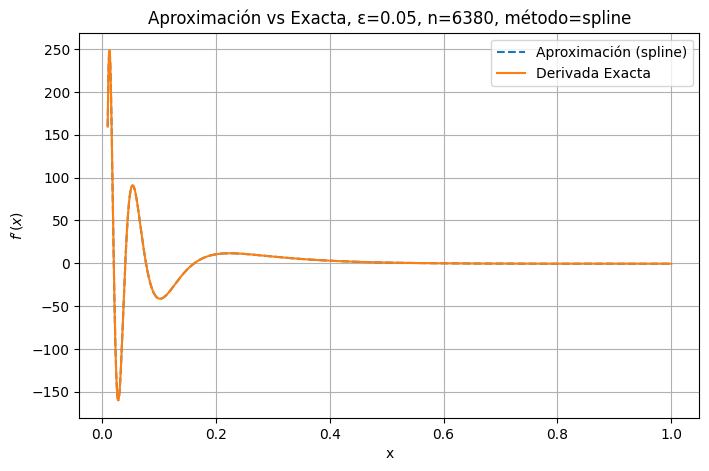

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Definimos la función f(x) = sin(1 / (x + epsilon))
def f(x, epsilon):
    return np.sin(1 / (x + epsilon))

# Definimos la derivada exacta de f(x)
def f_prime_exact(x, epsilon):
    return -np.cos(1 / (x + epsilon)) / (x + epsilon) ** 2

# Derivada utilizando spline cúbico
def spline_derivative(x, f_values):
    # Ajuste spline cúbico
    spline = CubicSpline(x, f_values)
    return spline.derivative()(x)

# Método para graficar la derivada exacta y aproximada
def plot_derivatives(n, epsilon, method="finite_difference"):
    # Crear nodos
    x = np.linspace(0.01, 1, n)
    f_values = f(x, epsilon)

    # Elegir método de cálculo
    if method == "finite_difference":
        f_prime_approx = finite_difference_derivative(x, f_values)
    elif method == "spline":
        f_prime_approx = spline_derivative(x, f_values)

    # Derivada exacta
    f_prime_exact_values = f_prime_exact(x, epsilon)

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(x, f_prime_approx, label=f"Aproximación ({method})", linestyle="--")
    plt.plot(x, f_prime_exact_values, label="Derivada Exacta", linestyle="-")
    plt.title(f"Aproximación vs Exacta, ε={epsilon}, n={n}, método={method}")
    plt.xlabel("x")
    plt.ylabel(r"$f'(x)$")
    plt.legend()
    plt.grid()
    plt.show()

    return x, f_prime_approx, f_prime_exact_values

# Cálculo adaptativo del número de nodos (n)
def compute_tolerance_adaptive(epsilon, tol=0.1, max_iter=10000, method="finite_difference"):
    n = 10
    max_diff = float("inf")
    iteration = 0

    while max_diff > tol and iteration < max_iter:
        n += 10
        x = np.linspace(0.01, 1, n)
        f_values = f(x, epsilon)

        if method == "finite_difference":
            f_prime_approx = finite_difference_derivative(x, f_values)
        elif method == "spline":
            f_prime_approx = spline_derivative(x, f_values)

        f_prime_exact_values = f_prime_exact(x, epsilon)
        max_diff = np.max(np.abs(f_prime_approx - f_prime_exact_values))
        iteration += 1

    if iteration == max_iter:
        print("Advertencia: Se alcanzó el máximo de iteraciones.")

    return n, max_diff

# Derivada aproximada por diferencias finitas (usada como alternativa)
def finite_difference_derivative(x, f_values):
    h = x[1] - x[0]
    f_prime_approx = np.zeros_like(f_values)
    f_prime_approx[1:-1] = (f_values[2:] - f_values[:-2]) / (2 * h)
    f_prime_approx[0] = (f_values[1] - f_values[0]) / h
    f_prime_approx[-1] = (f_values[-1] - f_values[-2]) / h
    return f_prime_approx

# Ejecución principal
if __name__ == "__main__":
    epsilon_values = [1 / 5, 1 / 10, 1 / 20]
    tolerances = [0.1, 0.01, 0.001]

    # Comparar métodos
    for epsilon in epsilon_values:
        for tol in tolerances:
            print(f"---- ε = {epsilon}, tol = {tol} ----")
            for method in ["finite_difference", "spline"]:
                n, max_diff = compute_tolerance_adaptive(epsilon, tol, method=method)
                print(f"Método: {method}, n = {n}, Diferencia Máxima = {max_diff:.5f}")
                plot_derivatives(n, epsilon, method=method)


A4

In [6]:

import numpy as np
from scipy.special import roots_legendre

def f(x):
    """
    Función a integrar: e^(4x).
    """
    return np.exp(4 * x)

def gauss_legendre_rule(func, a, b, n):
    """
    Método de Gauss-Legendre para calcular la integral de una función.

    Parameters:
    - func: Función a integrar.
    - a: Límite inferior de integración.
    - b: Límite superior de integración.
    - n: Número de puntos (orden de la cuadratura).

    Returns:
    - Integral aproximada usando el método de Gauss-Legendre.
    """
    # Obtener raíces (xi) y pesos (wi) para el polinomio de Legendre de grado n
    xi, wi = roots_legendre(n)

    # Transformar los puntos y pesos al intervalo [a, b]
    xi_mapped = 0.5 * (b - a) * xi + 0.5 * (b + a)
    wi_mapped = 0.5 * (b - a) * wi

    # Evaluar la integral
    integral = np.sum(wi_mapped * func(xi_mapped))
    return integral

def find_min_n_gauss_legendre(func, a, b, epsilon, exact_value):
    """
    Encuentra el valor mínimo de n tal que el error sea menor o igual a epsilon usando Gauss-Legendre.

    Parameters:
    - func: Función a integrar.
    - a: Límite inferior de integración.
    - b: Límite superior de integración.
    - epsilon: Tolerancia de error.
    - exact_value: Valor exacto de la integral.

    Returns:
    - n_min: Mínimo número de puntos que satisface el criterio de error.
    - approx_value: Valor aproximado de la integral con n_min.
    """
    n = 1
    while True:
        approx_value = gauss_legendre_rule(func, a, b, n)
        error = abs(approx_value - exact_value)
        if error <= epsilon:
            return n, approx_value
        n += 1

# Parámetros de la integral
a = 0
b = 1
exact_value = (np.exp(4) - 1) / 4  # Valor exacto de la integral calculado analíticamente

# Valores de epsilon
epsilons = [1/100, 1/1000, 1/10000]

# Cálculo para cada epsilon
for epsilon in epsilons:
    n_min, approx_value = find_min_n_gauss_legendre(f, a, b, epsilon, exact_value)
    print(f"Para epsilon = {epsilon}:")
    print(f"  n mínimo requerido: {n_min}")
    print(f"  Valor aproximado: {approx_value:.10f}")
    print(f"  Error absoluto: {abs(approx_value - exact_value):.10e}\n")


Para epsilon = 0.01:
  n mínimo requerido: 4
  Valor aproximado: 13.3992370501
  Error absoluto: 3.0045820494e-04

Para epsilon = 0.001:
  n mínimo requerido: 4
  Valor aproximado: 13.3992370501
  Error absoluto: 3.0045820494e-04

Para epsilon = 0.0001:
  n mínimo requerido: 5
  Valor aproximado: 13.3995341893
  Error absoluto: 3.3189491511e-06



A6

In [7]:

import numpy as np
from scipy.special import roots_legendre
from math import sqrt, pi

# Definir la función a integrar
def f(x):
    return np.exp(-x**2)

# Método de Gauss-Legendre para integrar en [a, b]
def gauss_legendre_integral(f, a, b, n):
    nodes, weights = roots_legendre(n)
    # Transformación al intervalo [a, b]
    t = 0.5 * (nodes + 1) * (b - a) + a
    w = 0.5 * (b - a) * weights
    return np.sum(w * f(t))

# Definir T(n, L) para 2 * ∫[0, L] e^(-x^2) dx
def T(n, L):
    return 2 * gauss_legendre_integral(f, 0, L, n)

# Generar tabla de valores de T(n, L)
def compute_table():
    n_values = [100, 200, 300, 400, 500]
    L_values = [2, 4, 6, 8, 10]
    table = []

    for n in n_values:
        row = []
        for L in L_values:
            row.append(T(n, L))
        table.append(row)

    return n_values, L_values, table

# Mostrar tablas en formato legible
def print_table(n_values, L_values, table, title):
    print(title)
    print(f"{'n/L':<8}" + "".join([f"{L:<10}" for L in L_values]))
    for n, row in zip(n_values, table):
        print(f"{n:<8}" + "".join([f"{value:<10.6f}" for value in row]))
    print()

# Generar tabla de valores T(n, L)
n_values, L_values, T_table = compute_table()

# Mostrar la tabla de valores T(n, L)
print_table(n_values, L_values, T_table, "Tabla de T(n, L) usando Gauss-Legendre")


Tabla de T(n, L) usando Gauss-Legendre
n/L     2         4         6         8         10        
100     1.764163  1.772454  1.772454  1.772454  1.772454  
200     1.764163  1.772454  1.772454  1.772454  1.772454  
300     1.764163  1.772454  1.772454  1.772454  1.772454  
400     1.764163  1.772454  1.772454  1.772454  1.772454  
500     1.764163  1.772454  1.772454  1.772454  1.772454  

